<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [80]:
from typing import List
import requests
import json
import pandas as pd

# create a function
"""
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
"""
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:

    features_str = ','.join(features)
    url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&daily={features_str}&timezone=GMT&start_date={start_date}&end_date={end_date}'
    print(f'Calling MAT API with url : {url}')
    response = requests.get(url)
    json_response = response.json()
    json_response = json_response['daily']
    df = pd.read_json(json.dumps(json_response))

    return df

    # add your code here

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [85]:
# add your code here


data_df = acquire_data(51.5085, -0.1257, '2023-10-01', '2023-11-10', ['precipitation_sum','temperature_2m_max','temperature_2m_min', 'rain_sum'])
data_df.head()


Calling MAT API with url : https://api.open-meteo.com/v1/forecast?latitude=51.5085&longitude=-0.1257&daily=precipitation_sum,temperature_2m_max,temperature_2m_min,rain_sum&timezone=GMT&start_date=2023-10-01&end_date=2023-11-10


,time,precipitation_sum,temperature_2m_max,temperature_2m_min,rain_sum
0,2023-10-01,0.0,21.4,15.5,0.0
1,2023-10-02,0.7,20.2,15.9,0.0
2,2023-10-03,0.0,18.0,12.7,0.0
3,2023-10-04,0.0,17.9,11.1,0.0
4,2023-10-05,0.0,18.4,12.3,0.0


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


In [246]:
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt
import numpy as np
"""
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = fig.add_axes([0, 0, 4, 1])
    ax.plot(x, y, linewidth=2.0) 
    ax.set_xlabel(xlabel=x_label, fontsize=5)
    ax.set_ylabel(ylabel=y_label, fontsize=5) 

    fig.autofmt_xdate()
    
    ax.title.set_text(title)  
    

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

In [248]:
def lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = fig.add_axes([0, 0, 4, 1])
    ax.title.set_text(title)  
    ax.legend(["blue", "green"], loc ="lower right") 
   
    for y_value in ys:
     ax.plot(x, y_value, linewidth=2.0)
    

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


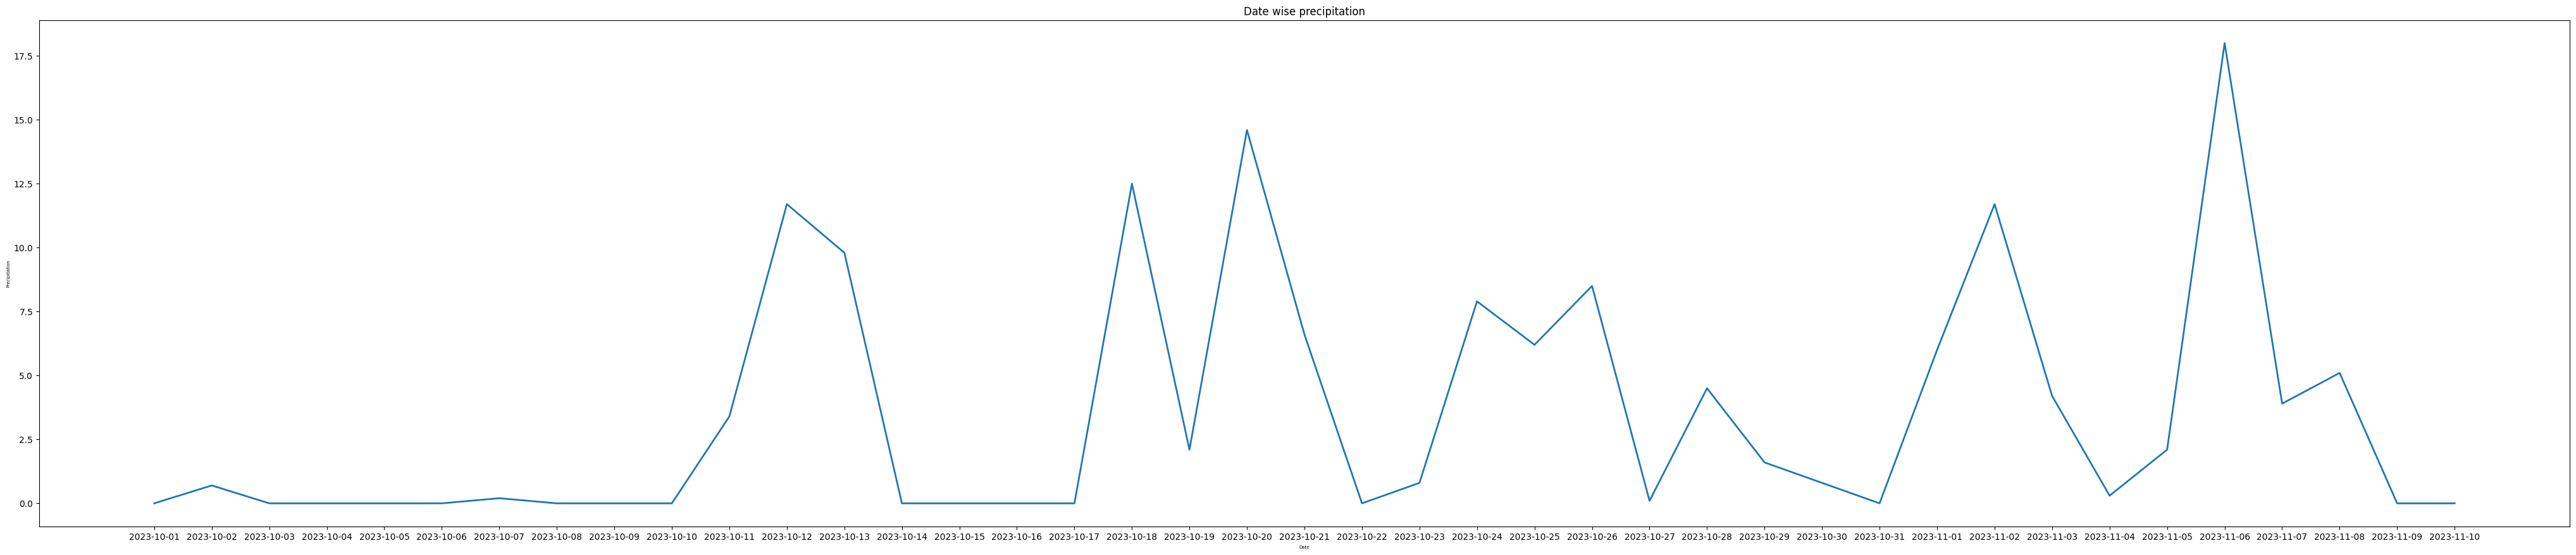

In [247]:
# add your code here
lineplot(data_df['time'], data_df['precipitation_sum'], title= 'Date wise precipitation', x_label = 'Date', y_label =  'Precipitation')



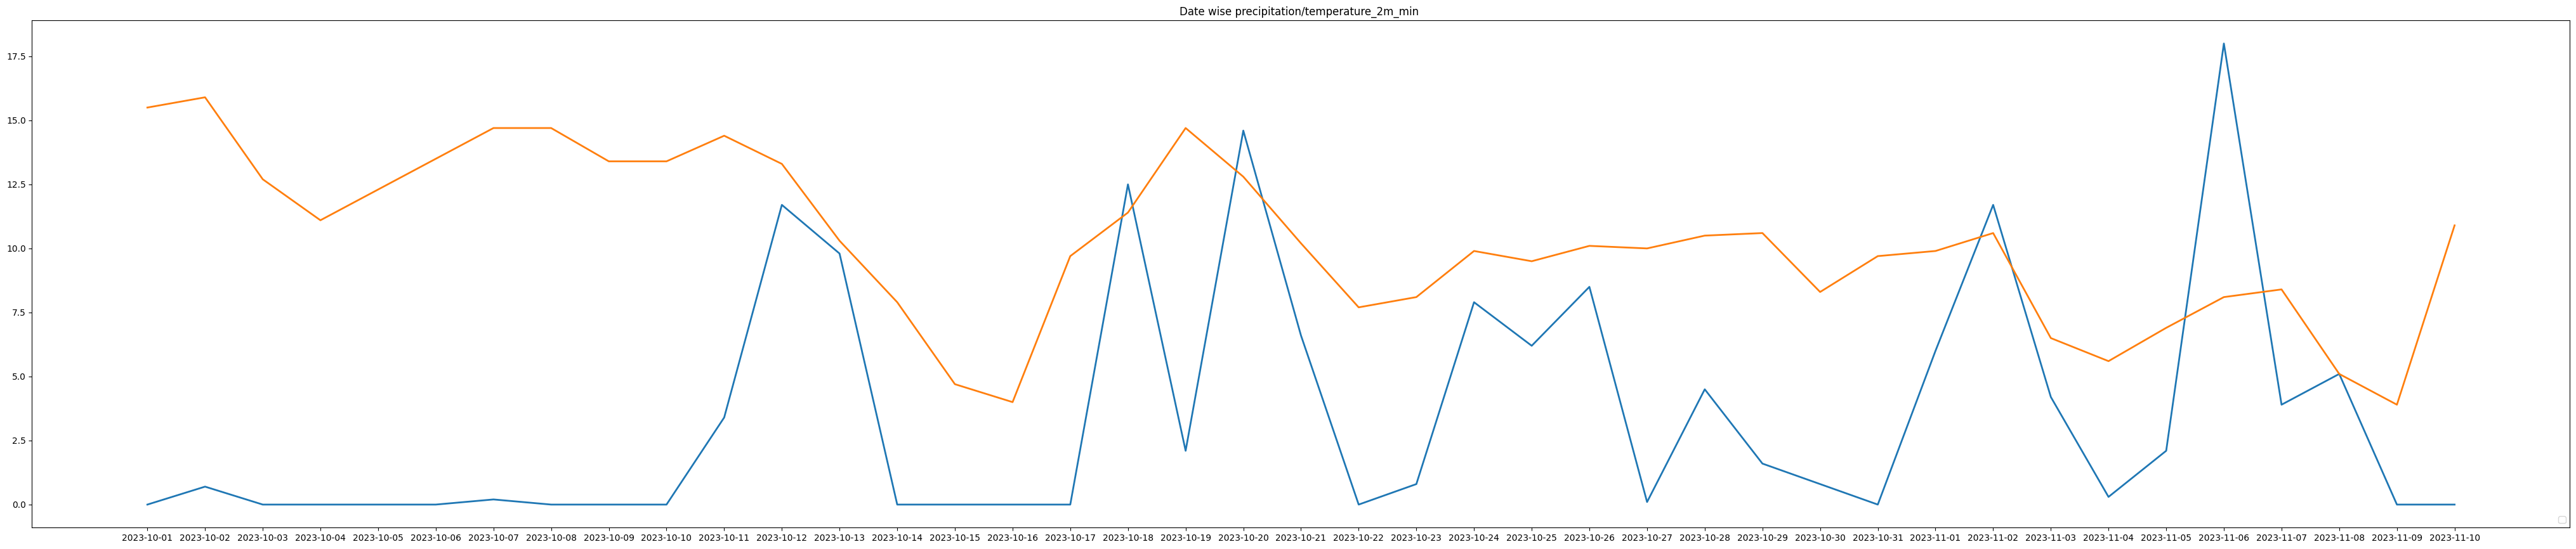

In [249]:
lineplots(data_df['time'], [data_df['precipitation_sum'],data_df['temperature_2m_min']] , title= 'Date wise precipitation/temperature_2m_min ', x_label = 'Date',
           y_label =  'Precipitation', legend= ['Precipitation', 'Temperature_2m_min'])

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [143]:
import numpy as np


def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    normalizedData = (x-np.min(x))/(np.max(x)-np.min(x))
    return normalizedData

    # add your code here

In [156]:
minmax_norm(data_df['temperature_2m_min'])


0     0.966667
1     1.000000
2     0.733333
3     0.600000
4     0.700000
5     0.800000
6     0.900000
7     0.900000
8     0.791667
9     0.791667
10    0.875000
11    0.783333
12    0.533333
13    0.333333
14    0.066667
15    0.008333
16    0.483333
17    0.625000
18    0.900000
19    0.741667
20    0.525000
21    0.316667
22    0.350000
23    0.500000
24    0.466667
25    0.516667
26    0.508333
27    0.550000
28    0.558333
29    0.366667
30    0.483333
31    0.500000
32    0.558333
33    0.216667
34    0.141667
35    0.250000
36    0.350000
37    0.375000
38    0.100000
39    0.000000
40    0.583333
Name: temperature_2m_min, dtype: float64

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [144]:
def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    zscore_norm = np.true_divide(np.subtract(x, np.mean(x)), np.std(x)) 
    return zscore_norm
    # add your code here

In [157]:

zscores = zscore_norm(data_df['temperature_2m_min'])
print(zscores)

0     1.657383
1     1.784042
2     0.770768
3     0.264131
4     0.644109
5     1.024086
6     1.404064
7     1.404064
8     0.992422
9     0.992422
10    1.309070
11    0.960757
12    0.010812
13   -0.749143
14   -1.762417
15   -1.984071
16   -0.179176
17    0.359125
18    1.404064
19    0.802433
20   -0.020852
21   -0.812473
22   -0.685813
23   -0.115847
24   -0.242506
25   -0.052517
26   -0.084182
27    0.074142
28    0.105807
29   -0.622484
30   -0.179176
31   -0.115847
32    0.105807
33   -1.192450
34   -1.477434
35   -1.065791
36   -0.685813
37   -0.590819
38   -1.635758
39   -2.015736
40    0.200801
Name: temperature_2m_min, dtype: float64


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [219]:
def zscore_outliers(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): indices of the outliers
    """
    #filtered = [x for x in x if zscore_norm(x) < 0]
    zscore_norms = zscore_norm(x)
    outliers = [item for item in zscore_norms if  abs(item) > threshold ]
    return outliers

    # add your code here

In [220]:

outliers = zscore_outliers(data_df['temperature_2m_min'], 1.02)
print(outliers)


[1.6573825341467594, 1.7840417772036412, 1.02408631886235, 1.4040640480329953, 1.4040640480329953, 1.3090696157403343, -1.7624170283890515, -1.9840707037385947, 1.4040640480329953, -1.192450434633083, -1.4774337315110673, -1.065791191576201, -1.6357577853321696, -2.0157355145028153]


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

In [281]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        outliers_idx (ArrayLike): indices of the outliers
    """
    # add your code here
    colors = ['red' if y_value in outliers else 'blue' for y_value in y]
    ax.scatter(x, y, facecolors=colors, color=colors, marker="o")
   


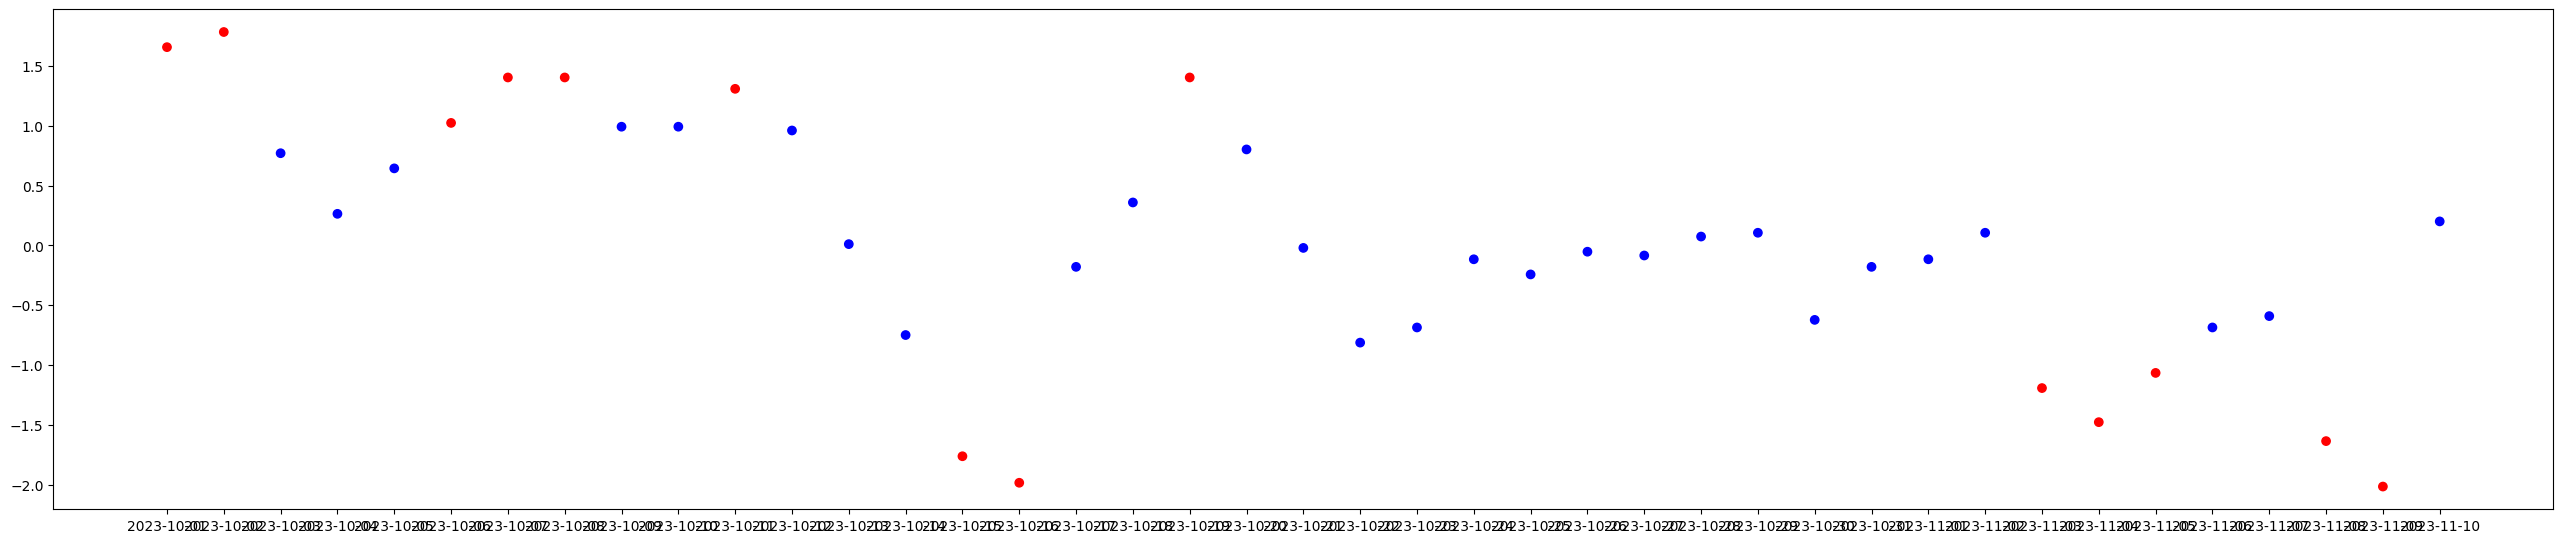

In [285]:
zscores = zscore_norm(data_df['temperature_2m_min'])
outliers = zscore_outliers(data_df['temperature_2m_min'], 1.00)
fig, ax = plt.subplots(figsize=(5, 5))
ax = fig.add_axes([0, 0, 5, 1])
fig.autofmt_xdate()
mark_outliers(ax, data_df['time'],  zscores, outliers)




<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


In [298]:
def iqr_detect(x: ArrayLike, threshold: float=1.5) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    first_quartile=np.quantile(a= x, q=0.25)
    third_quartile=np.quantile(a= x, q=0.75)
    iqr = third_quartile - first_quartile
    threshold = 1.5 * iqr
    lower_threshold = first_quartile - threshold
    upper_threshold = third_quartile + threshold
    return [x_value for x_value in x if abs(x_value-threshold) > first_quartile or abs(x_value-threshold) < third_quartile ]

In [304]:
outliers = iqr_detect(data_df['temperature_2m_min'])
print(len(data_df['temperature_2m_min']))
print(len(outliers))

7.050000000000002
41
41


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data
* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


In [13]:
def zscore_clamp(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    # add your code here

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


In [14]:
def zscore_interp(x: ArrayLike, y: ArrayLike, threshold: int=3, deg: int=1) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation

    Returns:
        (ArrayLike): interpolated data
    """
    # add your code here